# Twitter Sentiment Analysis 



## Importing the necessary packages 

In [164]:
import re
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import seaborn as sns; sns.set()
import nltk
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline

##  Dataset used for our analysis

In [165]:
df = pd.read_csv("train.csv")
df

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


#### Here we see that there are following tweets in the training dataset

In [166]:
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [167]:
df.drop(['id'],inplace=True,axis=1)

In [168]:
df.dropna(inplace=True)

In [169]:
df.head(12)

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation
5,0,[2/2] huge fan fare and big talking before the...
6,0,@user camping tomorrow @user @user @user @use...
7,0,the next school year is the year for exams.ð...
8,0,we won!!! love the land!!! #allin #cavs #champ...
9,0,@user @user welcome here ! i'm it's so #gr...


# Data Pre-Processing

##  Removing Twitter Handles

Given below is a user-defined function to remove unwanted text patterns from the tweets. It takes two arguments, one is the original string of text and the other is the pattern of text that we want to remove from the string. The function returns the same input string but without the given pattern. We will use this function to remove the pattern ‘@user’ from all the tweets in our data.


In [170]:
def remove_pattern(text,pattern):
    
    # re.findall() finds the pattern i.e @user and puts it in a list for further task
    r = re.findall(pattern,text)
    
    # re.sub() removes @user from the sentences in the dataset
    for i in r:
        text = re.sub(i,"",text)
    
    return text
        

In [171]:
df['Tidy_Tweets'] = np.vectorize(remove_pattern)(df['tweet'], "@[\w]*")

df.head()

,label,tweet,Tidy_Tweets
0,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,0,bihday your majesty,bihday your majesty
3,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation,factsguide: society now #motivation


## Removing Punctuations, Numbers, and Special Characters

Punctuations, numbers and special characters do not help much. It is better to remove them from the text just as we removed the twitter handles. Here we will replace everything except characters and hashtags with spaces.

In [172]:
df['Tidy_Tweets'] = df['Tidy_Tweets'].str.replace("[^a-zA-Z#]", " ")

In [173]:
df.head(10)

,label,tweet,Tidy_Tweets
0,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause th...
2,0,bihday your majesty,bihday your majesty
3,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation,factsguide society now #motivation
5,0,[2/2] huge fan fare and big talking before the...,huge fan fare and big talking before the...
6,0,@user camping tomorrow @user @user @user @use...,camping tomorrow danny
7,0,the next school year is the year for exams.ð...,the next school year is the year for exams ...
8,0,we won!!! love the land!!! #allin #cavs #champ...,we won love the land #allin #cavs #champ...
9,0,@user @user welcome here ! i'm it's so #gr...,welcome here i m it s so #gr


## Removing Short Words


We have to be a little careful here in selecting the length of the words which we want to remove. So, I have decided to remove all the words having length 3 or less. For example, terms like “hmm”, “oh” are of very little use. It is better to get rid of them.

In [174]:
df['Tidy_Tweets'] = df['Tidy_Tweets'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

df.head(10)

,label,tweet,Tidy_Tweets
0,0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,0,bihday your majesty,bihday your majesty
3,0,#model i love u take with u all the time in ...,#model love take with time
4,0,factsguide: society now #motivation,factsguide society #motivation
5,0,[2/2] huge fan fare and big talking before the...,huge fare talking before they leave chaos disp...
6,0,@user camping tomorrow @user @user @user @use...,camping tomorrow danny
7,0,the next school year is the year for exams.ð...,next school year year exams think about that #...
8,0,we won!!! love the land!!! #allin #cavs #champ...,love land #allin #cavs #champions #cleveland #...
9,0,@user @user welcome here ! i'm it's so #gr...,welcome here


 ## Tokenization

Now we will tokenize all the cleaned tweets in our dataset. Tokens are individual terms or words, and tokenization is the process of splitting a string of text into tokens.

In [175]:
tokenized_tweet = df['Tidy_Tweets'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, cause, they, offer, wh...
2                              [bihday, your, majesty]
3                     [#model, love, take, with, time]
4                   [factsguide, society, #motivation]
Name: Tidy_Tweets, dtype: object

## Stemming

Stemming is a rule-based process of stripping the suffixes (“ing”, “ly”, “es”, “s” etc) from a word. For example, For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”

In [176]:
from nltk import PorterStemmer

ps = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [ps.stem(i) for i in x])

tokenized_tweet.head()

0    [when, father, dysfunct, selfish, drag, kid, i...
1    [thank, #lyft, credit, caus, they, offer, whee...
2                              [bihday, your, majesti]
3                     [#model, love, take, with, time]
4                         [factsguid, societi, #motiv]
Name: Tidy_Tweets, dtype: object

#### Now let’s stitch these tokens back together.

In [177]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

df['Tidy_Tweets'] = tokenized_tweet
df.head()

,label,tweet,Tidy_Tweets
0,0,@user when a father is dysfunctional and is s...,when father dysfunct selfish drag kid into dys...
1,0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit caus they offer wheelchair ...
2,0,bihday your majesty,bihday your majesti
3,0,#model i love u take with u all the time in ...,#model love take with time
4,0,factsguide: society now #motivation,factsguid societi #motiv


# Extracting Features from cleaned Tweets

### Bag-of-Words Features

Bag of Words is a method to extract features from text documents. These features can be used for training machine learning algorithms. It creates a vocabulary of all the unique words occurring in all the documents in the training set. 

Consider a corpus (a collection of texts) called C of D documents {d1,d2…..dD} and N unique tokens extracted out of the corpus C. The N tokens (words) will form a list, and the size of the bag-of-words matrix M will be given by D X N. Each row in the matrix M contains the frequency of tokens in document D(i).

For example, if you have 2 documents-



- D1: He is a lazy boy. She is lazy.

- D2: Smith is a lazy person.

First, it creates a vocabulary using unique words from all the documents
#### [‘He’ , ’She’ , ’lazy’ , 'boy’ ,  'Smith’  , ’person’] 

- Here, D=2, N=6



- The matrix M of size 2 X 6 will be represented as:

![bow](https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2018/07/table.png)

The above table depicts the training features containing term frequencies of each word in each document. This is called bag-of-words approach since the number of occurrence and not sequence or order of words matters in this approach.

In [178]:
from sklearn.feature_extraction.text import CountVectorizer

bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')

# bag-of-words feature matrix
bow = bow_vectorizer.fit_transform(df['Tidy_Tweets'])

df_bow = pd.DataFrame(bow.todense())

df_bow

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31957,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31958,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31959,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31960,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### TF-IDF Features

Tf-idf stands for term frequency-inverse document frequency, and the tf-idf weight is a weight often used in information retrieval and text mining. This weight is a statistical measure used to evaluate how important a word is to a document in a collection or corpus. The importance increases proportionally to the number of times a word appears in the document but is offset by the frequency of the word in the corpus. 

- TF: Term Frequency, which measures how frequently a term occurs in a document. Since every document is different in length, it is possible that a term would appear much more times in long documents than shorter ones. Thus, the term frequency is often divided by the document length (aka. the total number of terms in the document) as a way of normalization: 
#### TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document).

- IDF: Inverse Document Frequency, which measures how important a term is. While computing TF, all terms are considered equally important. However it is known that certain terms, such as "is", "of", and "that", may appear a lot of times but have little importance. Thus we need to weigh down the frequent terms while scale up the rare ones, by computing the following: 
#### IDF(t) = log_e(Total number of documents / Number of documents with term t in it).


In [179]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf=TfidfVectorizer(max_df=0.90, min_df=2,max_features=1000,stop_words='english')

tfidf_matrix=tfidf.fit_transform(df['Tidy_Tweets'])

df_tfidf = pd.DataFrame(tfidf_matrix.todense())

df_tfidf

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31957,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31958,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31959,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31960,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Applying Classifiaction Techniques

### Using the features from Bag-of-Words Model for training set

In [180]:
train_bow = bow[:31962]

train_bow.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

### Using features from TF-IDF for training set

In [181]:
train_tfidf_matrix = tfidf_matrix[:31962]

train_tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

### Splitting the data into training and validation set

In [182]:
from sklearn.model_selection import train_test_split

#### Bag-of-Words Features

In [183]:
x_train_bow,x_valid_bow,y_train_bow,y_valid_bow = train_test_split(train_bow,df['label'],test_size=0.3,random_state=2)


#### Using TF-IDF features

In [184]:
x_train_tfidf,x_valid_tfidf,y_train_tfidf,y_valid_tfidf = train_test_split(train_tfidf_matrix,df['label'],test_size=0.3,random_state=17)

# 1.Naive Bayes

In [185]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

#### For BOW

In [186]:
y_pred = gnb.fit(x_train_bow.toarray(), y_train_bow).predict(x_valid_bow.toarray())
a1=accuracy_score(y_valid_bow,y_pred)
#print("Accuracy =%f"%(accuracy_score(y_valid_bow,y_pred)))

print(confusion_matrix(y_valid_bow,y_pred))

[[4454 4456]
 [  58  621]]


In [187]:
print(classification_report(y_valid_bow,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.50      0.66      8910
           1       0.12      0.91      0.22       679

    accuracy                           0.53      9589
   macro avg       0.55      0.71      0.44      9589
weighted avg       0.93      0.53      0.63      9589



#### For TFIDF

In [188]:
y_pred = gnb.fit(x_train_tfidf.toarray(), y_train_bow).predict(x_valid_tfidf.toarray())
b1=accuracy_score(y_valid_tfidf,y_pred)
print("Accuracy =%f"%(accuracy_score(y_valid_tfidf,y_pred)))

confusion_matrix(y_valid_tfidf,y_pred)

Accuracy =0.240067


array([[1849, 7092],
       [ 195,  453]], dtype=int64)

In [189]:
print(classification_report(y_valid_tfidf,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.21      0.34      8941
           1       0.06      0.70      0.11       648

    accuracy                           0.24      9589
   macro avg       0.48      0.45      0.22      9589
weighted avg       0.85      0.24      0.32      9589



# 2.Random Forest

In [190]:
from sklearn.ensemble import RandomForestClassifier

#### For Bow

In [191]:
clf = RandomForestClassifier(n_estimators=10, random_state=0)
clf.fit(x_train_bow.toarray(), y_train_bow)
y_pred=clf.predict(x_valid_bow)
a3=accuracy_score(y_valid_bow,y_pred)
print("Accuracy score is :{0:0.4f}".format(accuracy_score(y_valid_bow,y_pred)))
confusion_matrix(y_valid_bow,y_pred)

Accuracy score is :0.9372


array([[8627,  283],
       [ 319,  360]], dtype=int64)

In [192]:
print(classification_report(y_valid_bow,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      8910
           1       0.56      0.53      0.54       679

    accuracy                           0.94      9589
   macro avg       0.76      0.75      0.76      9589
weighted avg       0.94      0.94      0.94      9589



#### For TFIDF

In [193]:
clf = RandomForestClassifier(n_estimators=10, random_state=0)
clf.fit(x_train_tfidf.toarray(), y_train_tfidf)
y_pred=clf.predict(x_valid_tfidf)
b3=accuracy_score(y_valid_tfidf,y_pred)
print("Accuracy score is :{0:0.4f}".format(accuracy_score(y_valid_tfidf,y_pred)))
confusion_matrix(y_valid_tfidf,y_pred)

Accuracy score is :0.9508


array([[8786,  155],
       [ 317,  331]], dtype=int64)

In [194]:
print(classification_report(y_valid_tfidf,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      8941
           1       0.68      0.51      0.58       648

    accuracy                           0.95      9589
   macro avg       0.82      0.75      0.78      9589
weighted avg       0.95      0.95      0.95      9589



# 3.Gradient Boost

In [195]:
from sklearn.ensemble import GradientBoostingClassifier

#### For Bow

In [196]:
clf=GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0).fit(x_train_bow.toarray(), y_train_bow)
y_pred=clf.predict(x_valid_bow)
a4=accuracy_score(y_valid_bow,y_pred)
print("Accuracy score is :{0:0.4f}".format(accuracy_score(y_valid_bow,y_pred)))
confusion_matrix(y_valid_bow,y_pred)

Accuracy score is :0.9351


array([[8830,   80],
       [ 542,  137]], dtype=int64)

In [197]:
print(classification_report(y_valid_bow,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97      8910
           1       0.63      0.20      0.31       679

    accuracy                           0.94      9589
   macro avg       0.79      0.60      0.64      9589
weighted avg       0.92      0.94      0.92      9589



#### For TF-IDF

In [198]:
clf=GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0).fit(x_train_tfidf.toarray(), y_train_tfidf)
y_pred=clf.predict(x_valid_tfidf)
b4=accuracy_score(y_valid_tfidf,y_pred)
print("Accuracy score is :{0:0.4f}".format(accuracy_score(y_valid_tfidf,y_pred)))
confusion_matrix(y_valid_tfidf,y_pred)

Accuracy score is :0.9348


array([[8881,   60],
       [ 565,   83]], dtype=int64)

In [199]:
print(classification_report(y_valid_tfidf,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97      8941
           1       0.58      0.13      0.21       648

    accuracy                           0.93      9589
   macro avg       0.76      0.56      0.59      9589
weighted avg       0.92      0.93      0.91      9589




## 4.Decision Tree From Information Gain

In [200]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [201]:
dct = DecisionTreeClassifier(criterion='entropy', random_state=1)

### Using Bag-of-Words Features

In [202]:
dct.fit(x_train_bow,y_train_bow)
y_pred = dct.predict(x_valid_bow)
a5=accuracy_score(y_valid_bow,y_pred)
print("Accuracy score is :{0:0.4f}".format(accuracy_score(y_valid_bow,y_pred)))
confusion_matrix(y_valid_bow,y_pred)

Accuracy score is :0.9361


array([[8609,  301],
       [ 312,  367]], dtype=int64)

In [203]:
print(classification_report(y_valid_bow,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      8910
           1       0.55      0.54      0.54       679

    accuracy                           0.94      9589
   macro avg       0.76      0.75      0.76      9589
weighted avg       0.94      0.94      0.94      9589



### Using TF-IDF Features

In [204]:
dct.fit(x_train_tfidf,y_train_tfidf)
y_pred = dct.predict(x_valid_tfidf)
b5=accuracy_score(y_valid_tfidf,y_pred)
print("Accuracy score is :{0:0.4f}".format(accuracy_score(y_valid_tfidf,y_pred)))
confusion_matrix(y_valid_tfidf,y_pred)

Accuracy score is :0.9426


array([[8698,  243],
       [ 307,  341]], dtype=int64)

In [205]:
print(classification_report(y_valid_tfidf,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      8941
           1       0.58      0.53      0.55       648

    accuracy                           0.94      9589
   macro avg       0.77      0.75      0.76      9589
weighted avg       0.94      0.94      0.94      9589



# 5.Decision Tree using Gini Index

In [206]:
dct = DecisionTreeClassifier(criterion='gini', random_state=1)

### Using Bag-of-Words Features

In [207]:
dct.fit(x_train_bow,y_train_bow)
y_pred = dct.predict(x_valid_bow)
a6=accuracy_score(y_valid_bow,y_pred)

print("Accuracy score is :{0:0.4f}".format(accuracy_score(y_valid_bow,y_pred)))
confusion_matrix(y_valid_bow,y_pred)


Accuracy score is :0.9262


array([[8509,  401],
       [ 307,  372]], dtype=int64)

In [208]:
print(classification_report(y_valid_bow,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      8910
           1       0.48      0.55      0.51       679

    accuracy                           0.93      9589
   macro avg       0.72      0.75      0.74      9589
weighted avg       0.93      0.93      0.93      9589




### Using TE-IDF Features

In [209]:
dct.fit(x_train_tfidf,y_train_tfidf)
y_pred = dct.predict(x_valid_tfidf)
b6=accuracy_score(y_valid_tfidf,y_pred)
print("Accuracy score is :{0:0.4f}".format(accuracy_score(y_valid_tfidf,y_pred)))
confusion_matrix(y_valid_tfidf,y_pred)

Accuracy score is :0.9441


array([[8714,  227],
       [ 309,  339]], dtype=int64)

In [210]:
print(classification_report(y_valid_tfidf,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      8941
           1       0.60      0.52      0.56       648

    accuracy                           0.94      9589
   macro avg       0.78      0.75      0.76      9589
weighted avg       0.94      0.94      0.94      9589



# Model Comparison

In [211]:
Algo=['Naive Bayes(Bag-of-Words)','Naive Bayes(TF-IDF)','Random Forest(Bag-of-Words)','Random Forest(TF-IDF)','Gradient Boost(Bag-of-Words)','Gradient Boost(TF-IDF)','Decision Tree(Gain)(Bag-of-Words)','Decision Tree(Gain)(TF-IDF)','Decision Tree(Gini)(Bag-of-Words)','Decision Tree(Gini)(TF-IDF)']

In [212]:
score = [a1,b1,a3,b3,a4,b4,a5,b5,a6,b6]

compare=pd.DataFrame({'Model':Algo,'Accuracy':score},index=[i for i in range(1,11)])

In [213]:
compare.T

,1,2,3,4,5,6,7,8,9,10
Model,Naive Bayes(Bag-of-Words),Naive Bayes(TF-IDF),Random Forest(Bag-of-Words),Random Forest(TF-IDF),Gradient Boost(Bag-of-Words),Gradient Boost(TF-IDF),Decision Tree(Gain)(Bag-of-Words),Decision Tree(Gain)(TF-IDF),Decision Tree(Gini)(Bag-of-Words),Decision Tree(Gini)(TF-IDF)
Accuracy,0.529252,0.240067,0.93722,0.950777,0.935134,0.934821,0.936073,0.942643,0.926165,0.944103


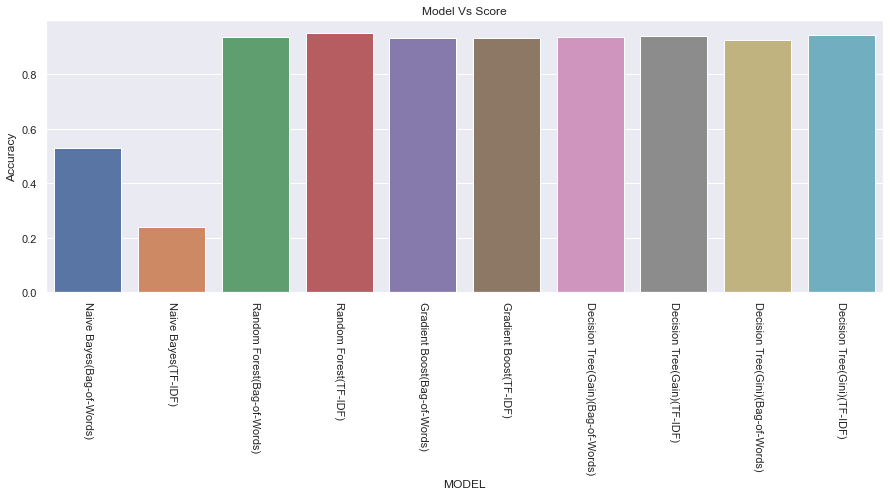

In [214]:
plt.figure(figsize=(15,5))
sns.barplot(x='Model',y='Accuracy',data=compare)
plt.title('Model Vs Score')
plt.xlabel('MODEL')
plt.xticks(rotation =270)


plt.show()